In [4]:
#для построения графиков внутри notebook'a
%pylab inline 
import pylab as pl # библиотека для построения графиков
import numpy as np # библиотека для осуществления вычислений

Populating the interactive namespace from numpy and matplotlib


In [16]:
# sigmoid function - или функция активации нейронов
def sigmoid(x,deriv=False): 
    if(deriv==True): # если истина  - то нам нужна производная
        return x*(1-x) # возвращаем производную функции
    return 1/(1+np.exp(-x)) # возвращаем функцию

In [4]:
# для примера построим график функции
tmpX = np.arange(-5,5,0.1) 

In [5]:
tmpY = sigmoid(tmpX)

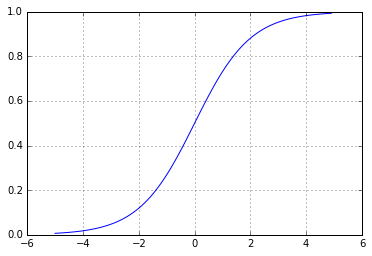

In [6]:
pl.plot(tmpX,tmpY)
plt.grid()

In [8]:
# Входные данные
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
print(X)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [7]:
# Выходные данные - T - транспонировать
y = np.array([[0,0,1,1]]).T 
print(y)

[[0]
 [0]
 [1]
 [1]]


In [9]:
# При генерации случаных чисел
# использовать детерминированный подход, т.е.
# при каждом запуске будут генерироваться 
# по одним и тем же правилам
np.random.seed(1)

In [13]:
# генерируем "синапсы" - веса связи между нейронами
# у нас 3 входа и 1 выход - получаем 3 связи
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[-0.39533485]
 [-0.70648822]
 [-0.81532281]]


In [17]:
for j in range(10000):
# forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * sigmoid(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

In [18]:
print ("Output After Training:")
print (l1)

Output After Training:
[[ 0.00966948]
 [ 0.0078636 ]
 [ 0.99359104]
 [ 0.99211657]]
